#**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JkaLNm2CRq5znTNycI2UYL96y2TTu57U#scrollTo=vHY6AtN82VHk)

# Setup

First, let's connect the notebook with Google Drive, so we will be able to load or store files, models, data, etc.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

Now, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the Data

## Download the Data

How the next chunks work is not important at this moment, just run them to get the data fetched.

In [5]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
fetch_housing_data()

In [7]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Finally, load the data

In [8]:
housing = load_housing_data()

In [9]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Take a Quick Look at the Data Structure

In [10]:

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [12]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


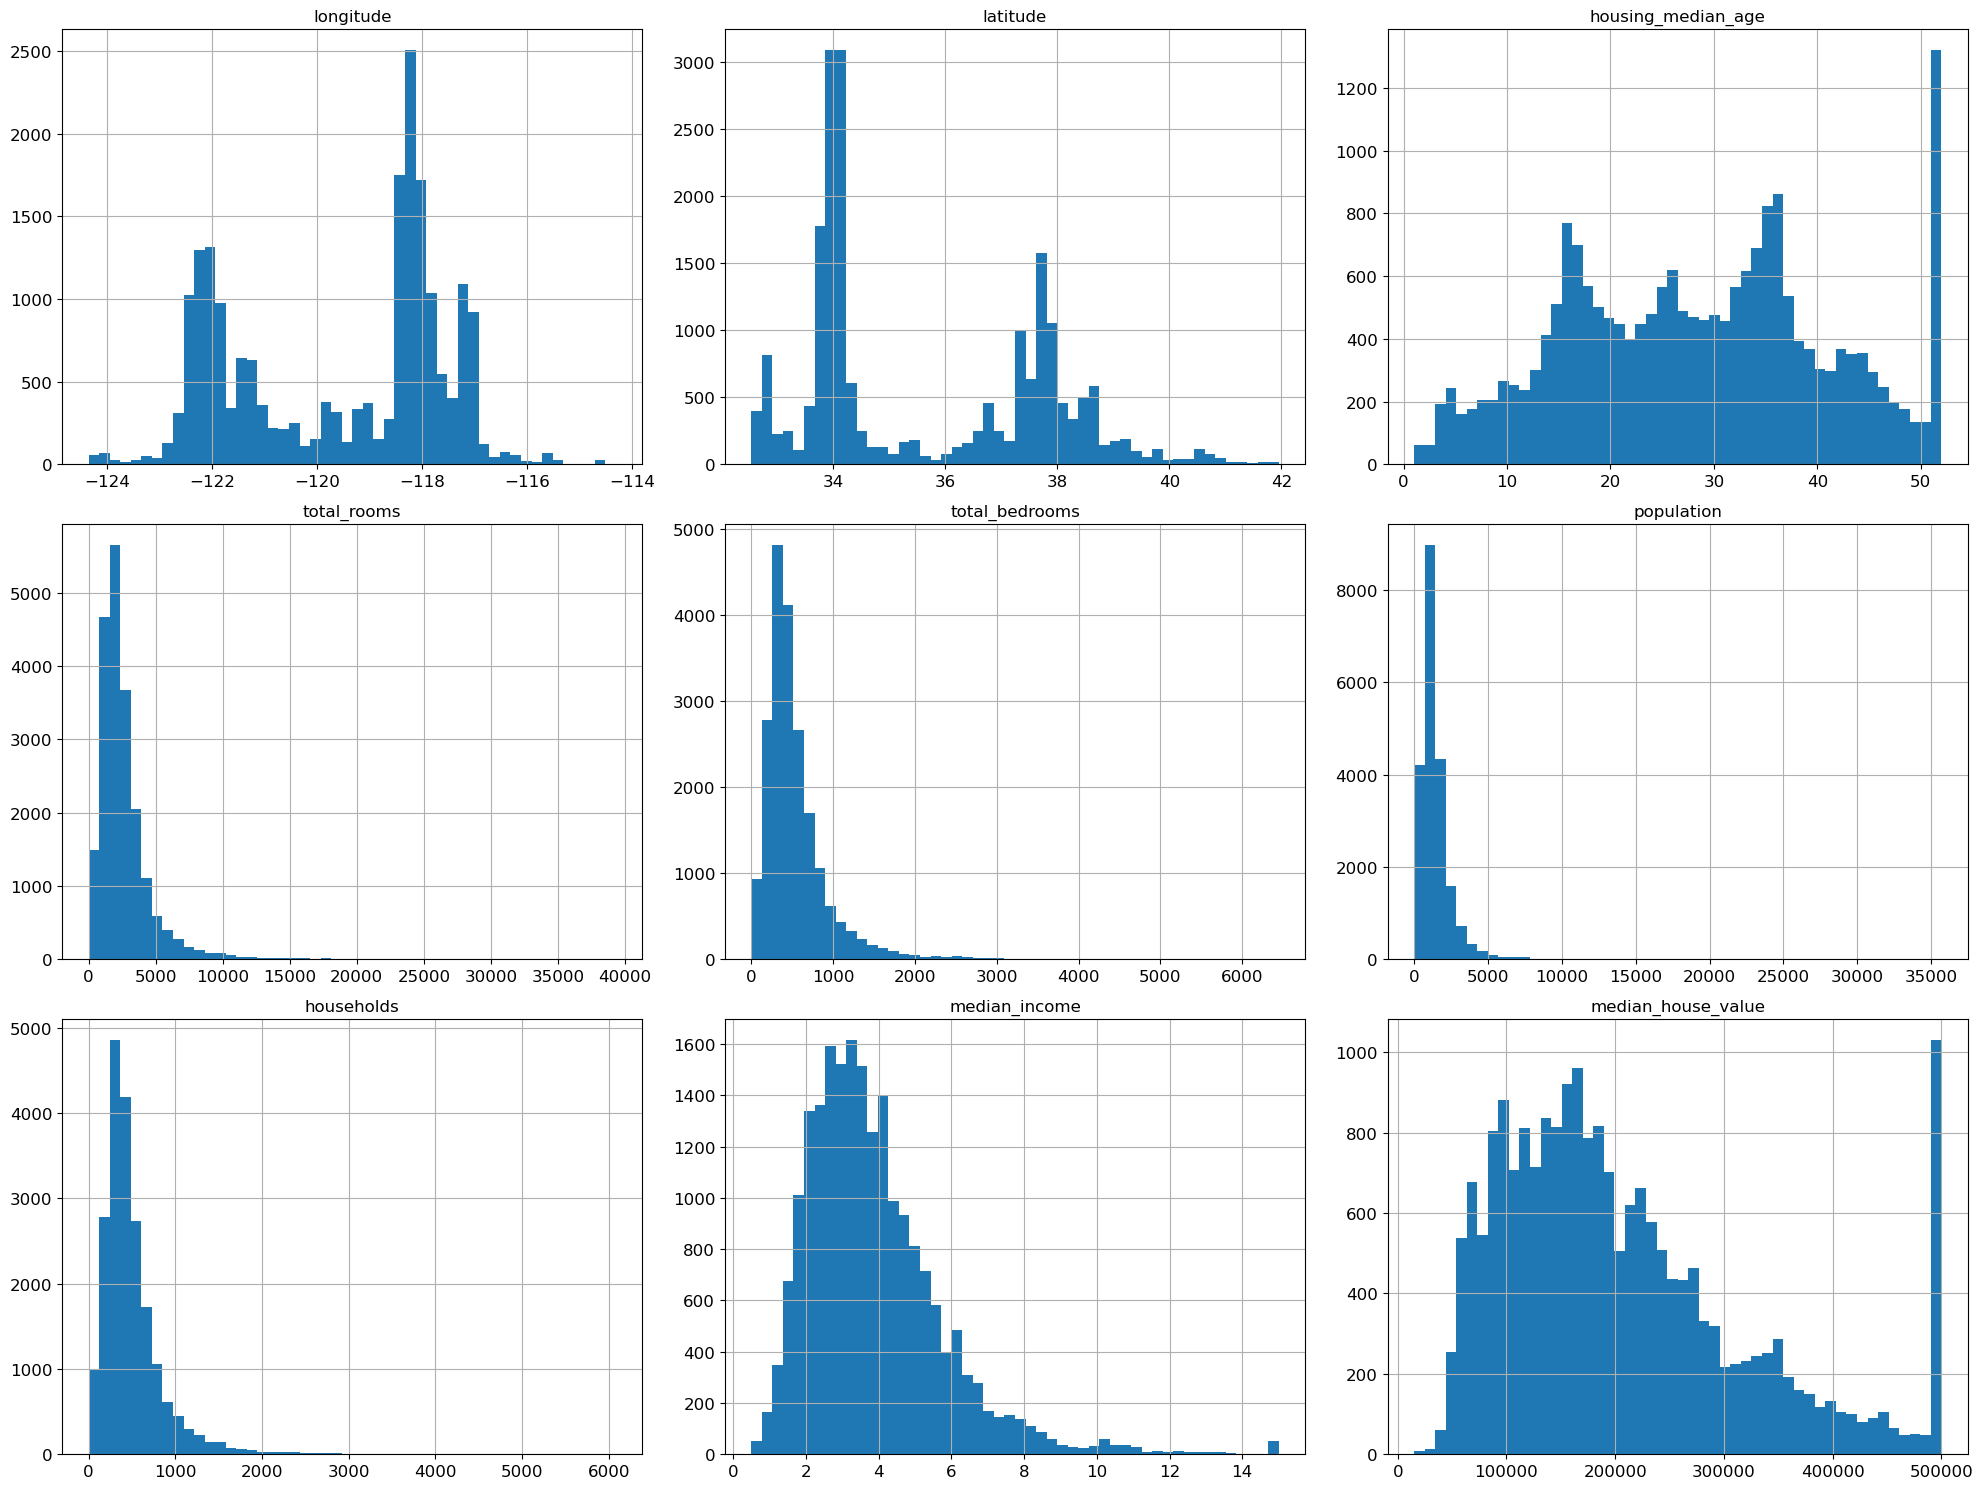

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Create a Test Set

In [15]:
# to make this notebook's output identical at every run
np.random.seed(1812) # Tchaikovsky's Overture :)



---



THIS is what we will be using

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1812)

In [17]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6872,-118.09,34.07,38.0,1036.0,226.0,1058.0,235.0,3.2578,184200.0,<1H OCEAN
17184,-122.49,37.50,21.0,1209.0,309.0,801.0,259.0,4.5625,500000.0,NEAR OCEAN
1461,-121.99,37.97,30.0,3320.0,589.0,1470.0,543.0,4.6071,184100.0,INLAND
1507,-122.05,37.93,15.0,7803.0,1603.0,2957.0,1546.0,4.4500,184900.0,NEAR BAY
17650,-121.88,37.26,25.0,3025.0,689.0,1755.0,661.0,3.8893,218600.0,<1H OCEAN


Now, you may want to perform some adjustments to certain variable. For instance, We don't have enough instances (observations, data...) for the districts that are above a median income equal to 6, as the following plot shows:

<Axes: >

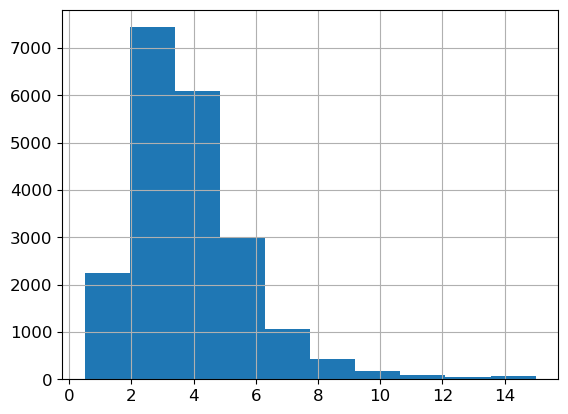

In [18]:
housing["median_income"].hist()

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [20]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

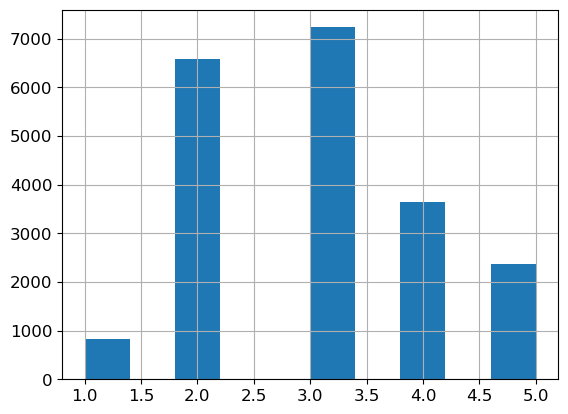

In [21]:
housing["income_cat"].hist()

One may also want to stratify a sample; i.e, preserving the proportion of samples in each class (in this case, according to *income_cat*).

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1812)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Shares in the testing set.

In [23]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Sahres in the training set. They do coincide, stratification process has been correct.

In [24]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

This is just a fancy way to calculate the shares and see how much they diverge.

In [25]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=1812)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.038033,-4.501217,0.364964
2,0.318847,0.318798,0.332607,4.315454,-0.015195
3,0.350581,0.350533,0.347384,-0.912106,-0.013820
4,0.176308,0.176357,0.169574,-3.819731,0.027480
5,0.114438,0.114341,0.112403,-1.778154,-0.084674


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

Let's just make a copy of the training set and call it *housing*.

In [28]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

Saving figure bad_visualization_plot


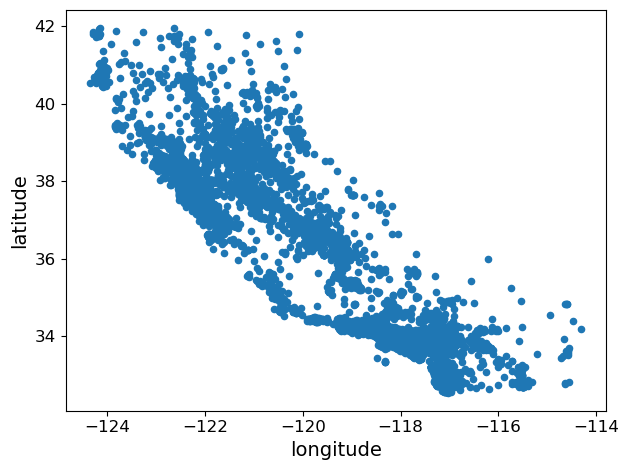

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

A bot more elaborated...

Saving figure housing_prices_scatterplot


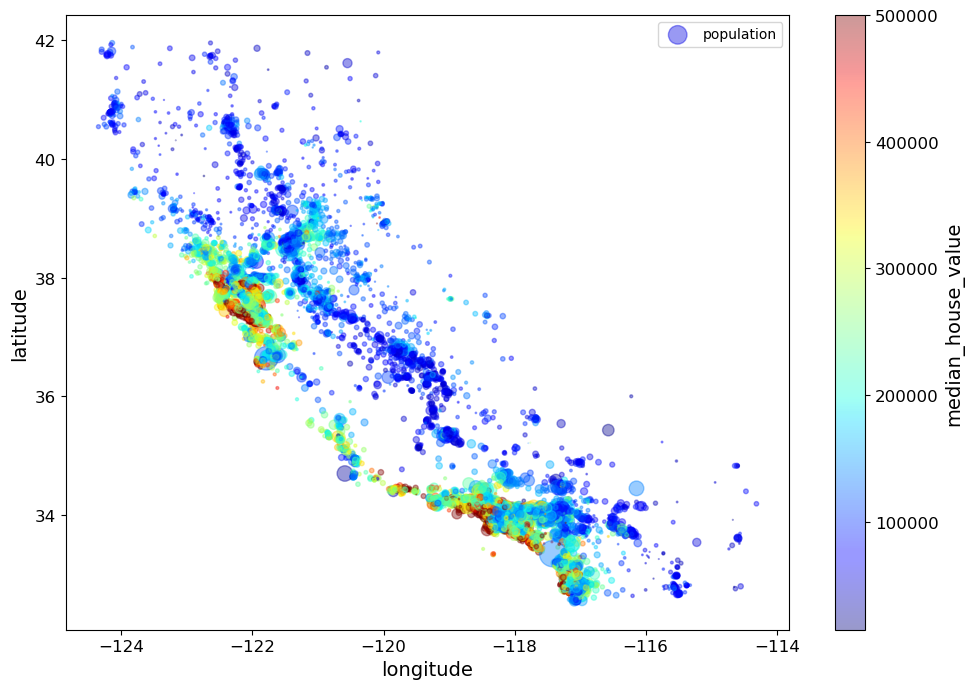

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

A bit more...

In [31]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x24c413c1d30>)

Saving figure california_housing_prices_plot


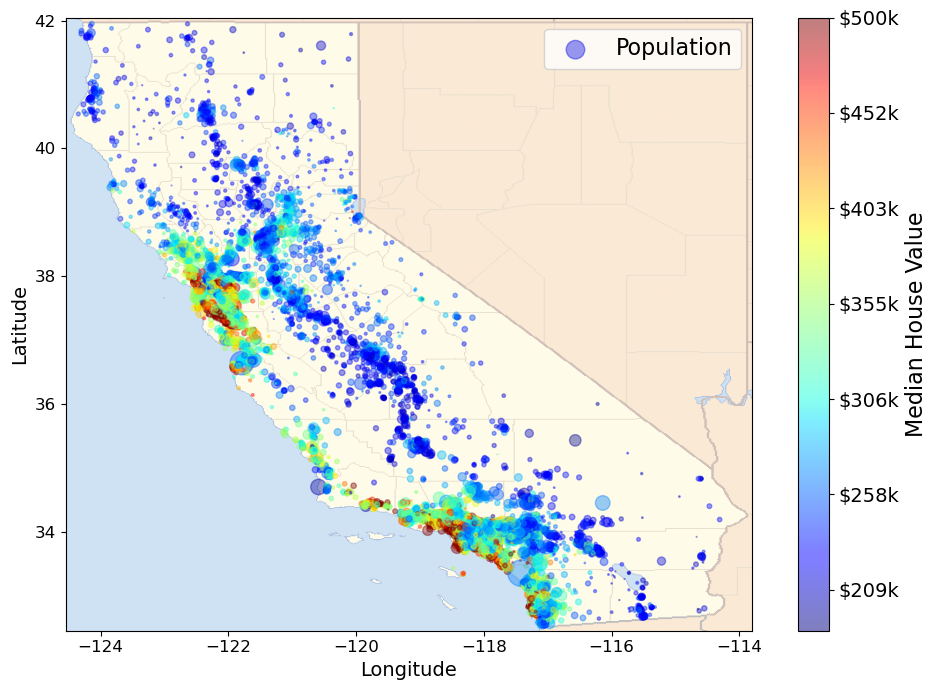

In [32]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Looking for Correlations

In [33]:
corr_matrix = housing.corr()

C:\Users\javie\AppData\Local\Temp\ipykernel_21768\2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685270
total_rooms           0.135420
housing_median_age    0.102589
households            0.065370
total_bedrooms        0.050006
population           -0.025827
longitude            -0.048957
latitude             -0.139718
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


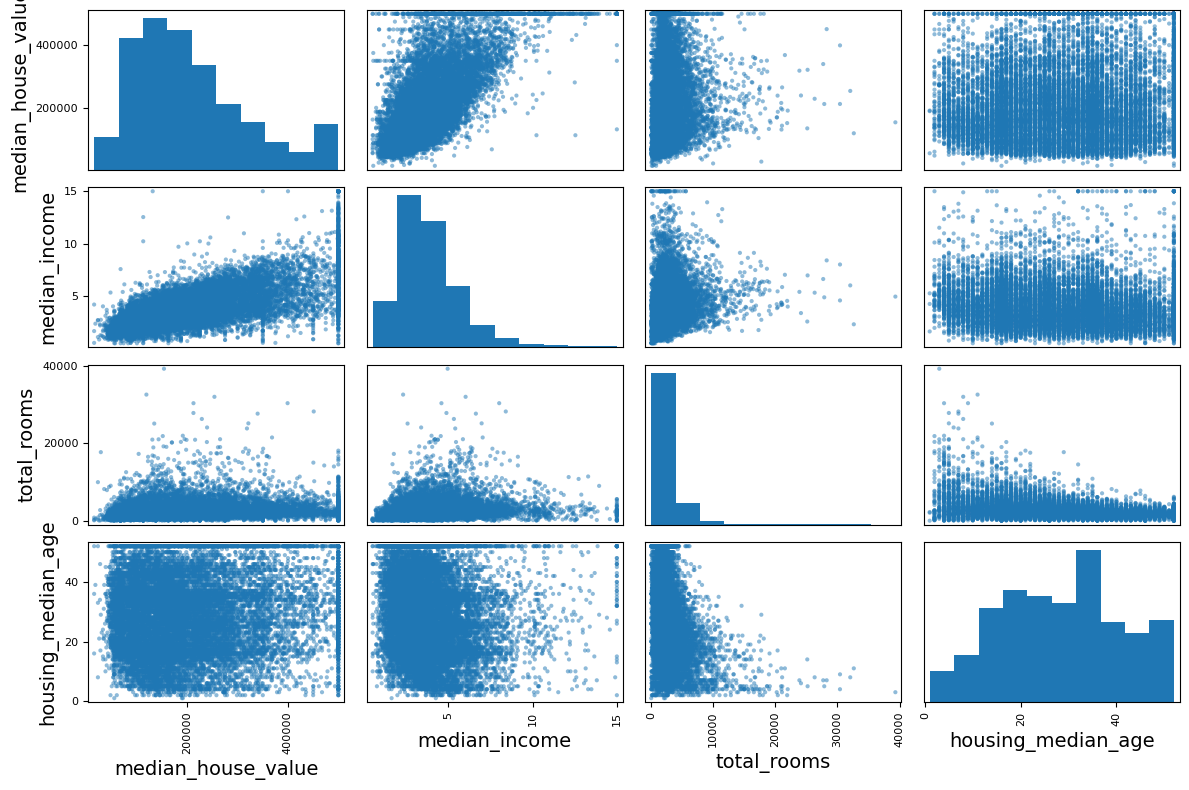

In [35]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


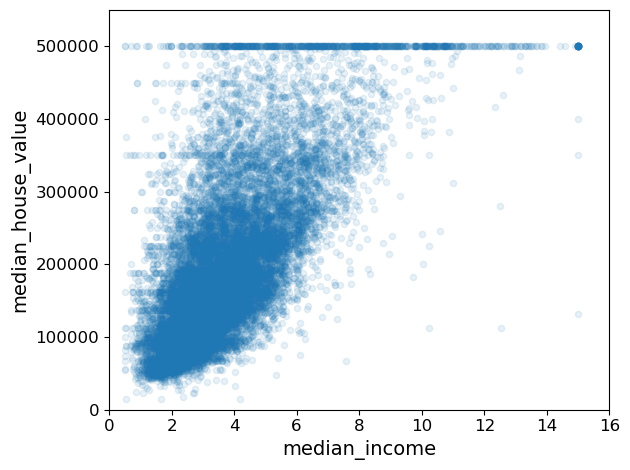

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## Experimenting with Attribute Combinations

In [37]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\javie\AppData\Local\Temp\ipykernel_21768\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.685270
rooms_per_household         0.156199
total_rooms                 0.135420
housing_median_age          0.102589
households                  0.065370
total_bedrooms              0.050006
population                 -0.025827
population_per_household   -0.038437
longitude                  -0.048957
latitude                   -0.139718
bedrooms_per_room          -0.257057
Name: median_house_value, dtype: float64

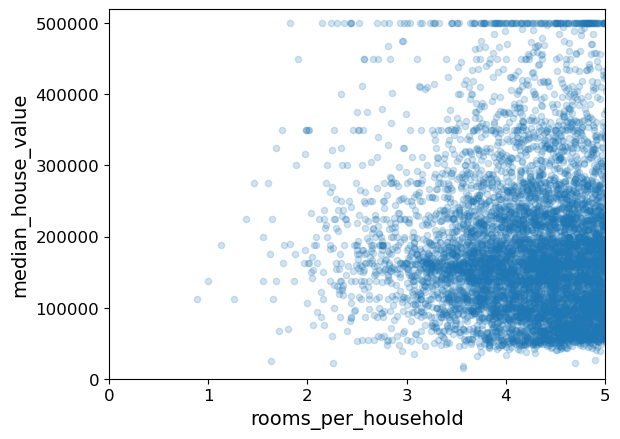

In [39]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [40]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16343.000000,16512.000000
mean,-119.562531,35.620896,28.630875,2637.598292,538.740378,1429.308018,500.400436,3.869509,207220.989099,5.426053,0.213131,2.994682
std,2.002863,2.136138,12.599122,2179.477144,422.842587,1145.314216,383.702790,1.903066,115250.262569,2.516875,0.057919,4.457629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.888889,0.100000,0.750000
25%,-121.790000,33.930000,18.000000,1454.000000,297.000000,790.750000,281.000000,2.560825,120100.000000,4.436645,0.175223,2.430613
50%,-118.480000,34.250000,29.000000,2129.000000,436.000000,1170.000000,410.000000,3.539100,180400.000000,5.223967,0.203451,2.818868
75%,-118.010000,37.710000,37.000000,3145.000000,647.000000,1726.000000,605.000000,4.740575,265125.000000,6.062902,0.239849,3.285976
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,502.461538


# Prepare the Data for Machine Learning Algorithms

Separate the labels and the features.

In [41]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

How to deal with NA. There are several options:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [42]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN
5059,-118.35,34.01,35.0,3776.0,NaN,1583.0,749.0,3.5486,<1H OCEAN
9620,-120.40,37.30,28.0,1401.0,NaN,967.0,257.0,1.5917,INLAND
10761,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [43]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [44]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
3778,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,<1H OCEAN
5059,-118.35,34.01,35.0,3776.0,1583.0,749.0,3.5486,<1H OCEAN
9620,-120.40,37.30,28.0,1401.0,967.0,257.0,1.5917,INLAND
10761,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [45]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

In [46]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4186,-118.23,34.13,48.0,1308.0,436.0,835.0,294.0,4.2891,<1H OCEAN
3778,-118.40,34.17,24.0,6347.0,436.0,2945.0,1492.0,3.3545,<1H OCEAN
5059,-118.35,34.01,35.0,3776.0,436.0,1583.0,749.0,3.5486,<1H OCEAN
9620,-120.40,37.30,28.0,1401.0,436.0,967.0,257.0,1.5917,INLAND
10761,-117.87,33.62,8.0,1266.0,436.0,375.0,183.0,9.8020,<1H OCEAN


There are also tools to impute certain statistics.

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [48]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [49]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [50]:
imputer.statistics_

array([-118.48  ,   34.25  ,   29.    , 2129.    ,  436.    , 1170.    ,
        410.    ,    3.5391])

Transform the training set:

In [51]:
#
X = imputer.transform(housing_num)

In [52]:
#housing_tr = pd.DataFrame(X, columns=housing_num.columns,
#                          index=housing.index)

In [53]:
#housing_tr.loc[sample_incomplete_rows.index.values]

In [54]:
#imputer.strategy

In [55]:
#housing_tr = pd.DataFrame(X, columns=housing_num.columns,
#                          index=housing_num.index)

In [56]:
#housing_tr.head()

## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [57]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
19815,INLAND
12313,INLAND
3866,<1H OCEAN
19074,<1H OCEAN
5836,<1H OCEAN
14569,NEAR OCEAN
16614,NEAR OCEAN
506,NEAR BAY
16727,<1H OCEAN
3967,<1H OCEAN


In [58]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.]])

In [59]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We mainly use One-hot encoder:

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [61]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [62]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

c:\Users\javie\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [63]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers (SKIP THIS)

Let's create a custom transformer to add extra attributes:

In [64]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

Note that I hard coded the indices (3, 4, 5, 6) for concision and clarity in the book, but it would be much cleaner to get them dynamically, like this:

In [65]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

Also, `housing_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you could run this:

In [66]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
19815,-119.28,36.54,33.0,1470.0,330.0,1222.0,301.0,1.8163,INLAND,4.883721,4.059801
12313,-116.57,33.64,10.0,489.0,82.0,183.0,74.0,6.2702,INLAND,6.608108,2.472973
3866,-118.46,34.17,24.0,2814.0,675.0,1463.0,620.0,4.1875,<1H OCEAN,4.53871,2.359677
19074,-122.49,38.3,14.0,2844.0,602.0,1613.0,544.0,3.3571,<1H OCEAN,5.227941,2.965074
5836,-118.34,34.2,41.0,2860.0,682.0,1516.0,621.0,3.0431,<1H OCEAN,4.605475,2.441224


## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes. A pipeline is a predefined set of steps that take place sequenciall when invoke it.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [68]:
housing_num_tr

array([[ 0.14106808,  0.4302775 ,  0.34679065, ..., -0.18101085,
        -0.51968993, -1.07892852],
       [ 1.49417214, -0.92735379, -1.47878862, ..., -1.08821295,
        -1.11131157,  1.26152422],
       [ 0.55049441, -0.67923497, -0.36756646, ...,  0.02941813,
         0.31170789,  0.1670989 ],
       ...,
       [-1.22701499,  0.63158145,  0.82302872, ..., -0.0561505 ,
         0.27522021, -1.15885462],
       [ 0.78516559, -0.89458338, -0.76443152, ..., -0.15568952,
        -0.25124486, -0.10504921],
       [ 0.75520757, -0.76818323,  0.98177474, ..., -0.22292201,
        -0.28773254, -0.97467252]])

In [69]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [70]:
housing_prepared

array([[ 0.14106808,  0.4302775 ,  0.34679065, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.49417214, -0.92735379, -1.47878862, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55049441, -0.67923497, -0.36756646, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22701499,  0.63158145,  0.82302872, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.78516559, -0.89458338, -0.76443152, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75520757, -0.76818323,  0.98177474, ...,  0.        ,
         0.        ,  0.        ]])

In [71]:
housing_prepared.shape

(16512, 13)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [72]:
# from sklearn.base import BaseEstimator, TransformerMixin

# # Create a class to select numerical or categorical columns
# class OldDataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [73]:
# num_attribs = list(housing_num)
# cat_attribs = ["ocean_proximity"]

# old_num_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(num_attribs)),
#         ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
#         ('std_scaler', StandardScaler()),
#     ])

# old_cat_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(cat_attribs)),
#         ('cat_encoder', OneHotEncoder(sparse=False)),
#     ])

In [74]:
# from sklearn.pipeline import FeatureUnion

# old_full_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", old_num_pipeline),
#         ("cat_pipeline", old_cat_pipeline),
#     ])

In [75]:
# old_housing_prepared = old_full_pipeline.fit_transform(housing)
# old_housing_prepared

The result is the same as with the `ColumnTransformer`:

In [76]:
# np.allclose(housing_prepared, old_housing_prepared)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [77]:
housing_prepared

array([[ 0.14106808,  0.4302775 ,  0.34679065, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.49417214, -0.92735379, -1.47878862, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.55049441, -0.67923497, -0.36756646, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.22701499,  0.63158145,  0.82302872, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.78516559, -0.89458338, -0.76443152, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75520757, -0.76818323,  0.98177474, ...,  0.        ,
         0.        ,  0.        ]])

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Compare against the actual values:

In [79]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69213.30019964871

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [80]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

50130.1172161327

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=1812)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=1812)

In [82]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation (will see this in Topic 3!)

In [83]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66295.67966623 66659.12297431 70273.5882273  69771.31575485
 69900.07993792 67763.53567171 70695.32652283 66362.84543014
 70254.05486175 69282.96285013]
Mean: 68725.85118971796
Standard deviation: 1675.67475145471


In [85]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66122.58887302 68303.47103327 71958.25311065 68338.53024527
 69913.6615923  69424.08999712 70855.71651084 66743.31845066
 71616.03252786 70197.47073313]
Mean: 69347.31330741159
Standard deviation: 1859.453503622374


Now let's try with a Random Forest (it will take a bit longer)

In [86]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=1812)
forest_reg.fit(housing_prepared, housing_labels)

0.0

Note that the next cell computes prediction in **training**

In [87]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18303.90715160855

The training error is much lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset that we shuffled and split in two parts.

If we check the validation errors will see how they are larger (this cell will take even longer to run due to the cross-validation process)

In [88]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [45805.074775   47345.07387878 51248.79208192 49019.13482577
 51097.03354824 50141.35400183 50776.3194369  45472.10523075
 50843.28806627 51064.74460228]
Mean: 49281.29204477345
Standard deviation: 2148.8364190281577


In [89]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69347.313307
std       1960.036092
min      66122.588873
25%      68312.235836
50%      69668.875795
75%      70691.155066
max      71958.253111
dtype: float64

In [90]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111283.05241146068

# Fine-Tune Your Model (we'll see this in Topic 3, too!)



## Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters with bootstrap True (default)
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=1812)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1812),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [92]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=1812)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [94]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63557.419572574625 {'max_features': 2, 'n_estimators': 3}
55715.009916414434 {'max_features': 2, 'n_estimators': 10}
52530.21111318271 {'max_features': 2, 'n_estimators': 30}
62658.457846127494 {'max_features': 4, 'n_estimators': 3}
53611.58659529225 {'max_features': 4, 'n_estimators': 10}
50972.39120086492 {'max_features': 4, 'n_estimators': 30}
58030.73355322436 {'max_features': 6, 'n_estimators': 3}
52340.75332476068 {'max_features': 6, 'n_estimators': 10}
50180.75791037471 {'max_features': 6, 'n_estimators': 30}
59299.87738845188 {'max_features': 8, 'n_estimators': 3}
52296.71978384641 {'max_features': 8, 'n_estimators': 10}
50330.104032802315 {'max_features': 8, 'n_estimators': 30}
63182.79136707148 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54612.62583461687 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60450.87611887745 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53165.56982317545 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [95]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.154338,0.036463,0.006230,0.001429,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.828626e+09,-3.944937e+09,...,-4.039546e+09,1.693255e+08,18,-1.076609e+09,-1.127744e+09,-1.104431e+09,-1.139081e+09,-1.075921e+09,-1.104757e+09,2.580877e+07
1,0.445434,0.025613,0.013881,0.002604,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.807204e+09,-3.116672e+09,...,-3.104162e+09,1.771387e+08,11,-5.848495e+08,-5.890004e+08,-5.737269e+08,-5.860916e+08,-5.510326e+08,-5.769402e+08,1.395195e+07
2,1.528643,0.213125,0.038393,0.003274,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.523448e+09,-2.814276e+09,...,-2.759423e+09,1.363103e+08,7,-4.433157e+08,-4.359636e+08,-4.166804e+08,-4.169166e+08,-4.109014e+08,-4.247555e+08,1.255944e+07
3,0.210573,0.010264,0.004472,0.000544,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.926747e+09,-3.987597e+09,...,-3.926082e+09,8.497515e+07,16,-1.110269e+09,-1.029947e+09,-9.596218e+08,-9.906182e+08,-9.858799e+08,-1.015267e+09,5.255185e+07
4,0.728700,0.070178,0.013692,0.003318,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.657749e+09,-2.946552e+09,...,-2.874202e+09,1.343791e+08,9,-5.417291e+08,-5.294559e+08,-5.180241e+08,-5.196629e+08,-5.106360e+08,-5.239016e+08,1.074391e+07
5,2.170927,0.150460,0.041036,0.010343,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.397253e+09,-2.647751e+09,...,-2.598185e+09,1.148184e+08,3,-4.201973e+08,-4.057169e+08,-3.844918e+08,-3.910969e+08,-3.802265e+08,-3.963459e+08,1.472827e+07
6,0.282343,0.028381,0.006212,0.002262,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.181246e+09,-3.446850e+09,...,-3.367566e+09,1.038921e+08,12,-9.364934e+08,-9.038762e+08,-8.451133e+08,-8.701903e+08,-8.655759e+08,-8.842498e+08,3.222622e+07
7,0.891687,0.021485,0.016345,0.003422,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.508782e+09,-2.842304e+09,...,-2.739554e+09,1.397766e+08,6,-5.263981e+08,-4.926190e+08,-4.965347e+08,-4.863625e+08,-4.844325e+08,-4.972694e+08,1.519472e+07
8,2.813583,0.129503,0.042332,0.005581,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.293704e+09,-2.558427e+09,...,-2.518108e+09,1.264642e+08,1,-4.031745e+08,-3.882704e+08,-3.770872e+08,-3.858686e+08,-3.733590e+08,-3.855519e+08,1.037656e+07
9,0.337959,0.014887,0.005830,0.001516,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.232239e+09,-3.506069e+09,...,-3.516475e+09,1.786653e+08,13,-9.405189e+08,-9.382003e+08,-9.134724e+08,-9.098089e+08,-9.043973e+08,-9.212796e+08,1.505989e+07


## Randomized Search

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=1812)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=1812)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1812),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024C4832BA30>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024C4832B340>},
                   random_state=1812, scoring='neg_mean_squared_error')

In [97]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50230.254366512825 {'max_features': 4, 'n_estimators': 56}
49580.65010857333 {'max_features': 7, 'n_estimators': 78}
79291.47328474186 {'max_features': 4, 'n_estimators': 1}
53942.92034576794 {'max_features': 1, 'n_estimators': 82}
49723.82019124619 {'max_features': 6, 'n_estimators': 68}
50001.73538025495 {'max_features': 4, 'n_estimators': 73}
49978.44850422017 {'max_features': 5, 'n_estimators': 66}
51991.49783377447 {'max_features': 7, 'n_estimators': 12}
50413.29703043825 {'max_features': 3, 'n_estimators': 117}
50358.33573497578 {'max_features': 5, 'n_estimators': 38}


## Analyze the Best Models and Their Errors

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.21437641e-01, 1.13112338e-01, 4.94274944e-02, 3.42469494e-02,
       2.95686644e-02, 4.12237138e-02, 2.77051589e-02, 4.26430941e-01,
       1.17759954e-02, 1.34595904e-01, 4.18571844e-04, 2.98247714e-03,
       7.07415068e-03])

In [99]:
# This is only to list them in order and with names

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4264309410242721, 'median_income'),
 (0.13459590445591776, 'pop_per_hhold'),
 (0.12143764092574803, 'longitude'),
 (0.11311233773424911, 'latitude'),
 (0.049427494368142165, 'housing_median_age'),
 (0.04122371376397447, 'population'),
 (0.034246949399139734, 'total_rooms'),
 (0.029568664369000526, 'total_bedrooms'),
 (0.027705158876078825, 'households'),
 (0.011775995425567122, 'rooms_per_hhold'),
 (0.007074150675128691, 'INLAND'),
 (0.002982477138344633, '<1H OCEAN'),
 (0.00041857184443667094, 'bedrooms_per_room')]

## Evaluate the best model on the test set

In [102]:
final_model = grid_search.best_estimator_

#Don't forget to make the same data treatment we did in the training
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Now, test!
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

# Get test errors, this is definitive
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47670.76046474886